In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz




In [2]:
df = pd.read_csv('C:/Users/Battlestation/Downloads/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
df['age_years'] = (df.age / 365.25).astype('int')

In [6]:
train_df = pd.get_dummies(df, columns=['cholesterol', 
                                       'gluc']).drop(['age','cardio'],
                                                     axis=1)
target = df.cardio

In [7]:
target

id
0        0
1        1
2        1
3        1
4        0
8        0
9        0
12       1
13       0
14       0
15       0
16       0
18       0
21       0
23       0
24       1
25       0
27       0
28       0
29       0
30       0
31       0
32       1
33       0
35       1
36       0
37       0
38       0
39       0
40       0
        ..
99958    1
99959    0
99960    1
99961    0
99962    0
99963    1
99964    0
99965    0
99967    1
99969    1
99971    0
99972    1
99973    1
99974    0
99975    1
99977    1
99978    0
99979    0
99981    0
99985    1
99986    1
99988    0
99990    1
99991    1
99992    1
99993    0
99995    1
99996    1
99998    1
99999    0
Name: cardio, Length: 70000, dtype: int64

In [8]:
train_df.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df.values, 
                                                      target.values,
                                                      test_size=.3, 
                                                      random_state=17)

In [10]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, 
                                                                y_train)

In [11]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [13]:
export_graphviz(tree, 'mlbootcamp5_dtree1.dot', filled=True, 
                feature_names=train_df.columns.values[:-1])

In [21]:
!dot -Tpng mlbootcamp5_dtree1.dot -o mlbootcamp5_dtree1.png

"rm" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [85]:
import os 
os.system("C:/Users/Battlestation/mlbootcamp5_dtree1.png")

0

In [86]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [49]:
df = pd.read_csv("J:/501/Test/test 1/data.txt", sep=";")
df.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [50]:
sdf = df.set_index(['DATA_TYPE']).sort_index()
sdf.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,52,6,Санкт-Петербург,44,1,BMW,...,1S,0,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
TEST,27162,7,7,0,52,6,Санкт-Петербург,33,2000,Skoda,...,N,0,1,0,0.0,0,0,15000.0,Санкт-Петербург,0.00
TEST,74873,11,11,0,59,3,Санкт-Петербург,36,8,Renault,...,0,0,1,0,0.0,0,3,0.0,Санкт-Петербург,0.09
TEST,27155,7,7,0,53,6,Санкт-Петербург,50,28,Toyota,...,0,0,0,0,0.0,0,2,0.0,Санкт-Петербург,0.00
TEST,27152,7,7,0,52,6,Москва,35,4,Ford,...,0,0,1,0,0.0,0,4,15000.0,Московская,0.02


In [51]:
df_test = sdf.loc['TEST ']
df_test.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,52,6,Санкт-Петербург,44,1,BMW,...,1S,0,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
TEST,27162,7,7,0,52,6,Санкт-Петербург,33,2000,Skoda,...,N,0,1,0,0.0,0,0,15000.0,Санкт-Петербург,0.00
TEST,74873,11,11,0,59,3,Санкт-Петербург,36,8,Renault,...,0,0,1,0,0.0,0,3,0.0,Санкт-Петербург,0.09
TEST,27155,7,7,0,53,6,Санкт-Петербург,50,28,Toyota,...,0,0,0,0,0.0,0,2,0.0,Санкт-Петербург,0.00
TEST,27152,7,7,0,52,6,Москва,35,4,Ford,...,0,0,1,0,0.0,0,4,15000.0,Московская,0.02


In [43]:
df_test['POLICY_INTERMEDIARY'] = pd.factorize(df_test['POLICY_INTERMEDIARY'])[0]
df_test['INSURER_GENDER'] = pd.factorize(df_test['INSURER_GENDER'])[0]


df_test['POLICY_PRV_CLM_GLT_N'] = pd.factorize(df_test['POLICY_PRV_CLM_GLT_N'])[0]
df_test['POLICY_CLM_GLT_N'] = pd.factorize(df_test['POLICY_CLM_GLT_N'])[0]
df_test['POLICY_YEARS_RENEWED_N'] = pd.factorize(df_test['POLICY_YEARS_RENEWED_N'])[0]

In [42]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, TEST  to TEST 
Data columns (total 29 columns):
POLICY_ID                        19198 non-null int64
POLICY_BEGIN_MONTH               19198 non-null int64
POLICY_END_MONTH                 19198 non-null int64
POLICY_IS_RENEWED                19198 non-null int64
POLICY_SALES_CHANNEL             19198 non-null int64
POLICY_SALES_CHANNEL_GROUP       19198 non-null int64
POLICY_BRANCH                    19198 non-null object
POLICY_MIN_AGE                   19198 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    19198 non-null int64
VEHICLE_MAKE                     19198 non-null object
VEHICLE_MODEL                    19198 non-null object
VEHICLE_ENGINE_POWER             19198 non-null float64
VEHICLE_IN_CREDIT                19198 non-null int64
VEHICLE_SUM_INSURED              19198 non-null float64
POLICY_INTERMEDIARY              19198 non-null object
INSURER_GENDER                   19198 non-null object
POLICY_CLM_N       

In [53]:
df_test.drop(['CLIENT_REGISTRATION_REGION', 'VEHICLE_MODEL',
             'POLICY_SALES_CHANNEL','POLICY_SALES_CHANNEL_GROUP', 'POLICY_BRANCH',
             'VEHICLE_MAKE','VEHICLE_MODEL','POLICY_CLM_N', 'POLICY_PRV_CLM_N',
             'POLICY_DEDUCT_VALUE','CLIENT_REGISTRATION_REGION','POLICY_PRICE_CHANGE'], axis=1, inplace=True)
df_test.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_GLT_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N
DATA_TYPE,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,44,1,184.0,0,1156200.0,6,F,1S,1S,0,1,0,0.0,0,1
TEST,27162,7,7,0,33,2000,110.0,1,890000.0,686,M,0,N,0,1,0,0.0,0,0
TEST,74873,11,11,0,36,8,75.0,0,277704.0,454,F,0,0,0,1,0,0.0,0,3
TEST,27155,7,7,0,50,28,146.0,0,781615.0,951,M,0,0,0,0,0,0.0,0,2
TEST,27152,7,7,0,35,4,100.0,0,319545.0,910,F,0,0,0,1,0,0.0,0,4


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, TEST  to TEST 
Data columns (total 19 columns):
POLICY_ID                        19198 non-null int64
POLICY_BEGIN_MONTH               19198 non-null int64
POLICY_END_MONTH                 19198 non-null int64
POLICY_IS_RENEWED                19198 non-null int64
POLICY_MIN_AGE                   19198 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    19198 non-null int64
VEHICLE_ENGINE_POWER             19198 non-null float64
VEHICLE_IN_CREDIT                19198 non-null int64
VEHICLE_SUM_INSURED              19198 non-null float64
POLICY_INTERMEDIARY              19198 non-null int64
INSURER_GENDER                   19198 non-null int64
POLICY_CLM_GLT_N                 19198 non-null int64
POLICY_PRV_CLM_GLT_N             19198 non-null int64
CLIENT_HAS_DAGO                  19198 non-null int64
CLIENT_HAS_OSAGO                 19198 non-null int64
POLICY_COURT_SIGN                19198 non-null int64
CLAIM_AVG_ACC_ST_PRD    

In [58]:
train_df = pd.get_dummies(df_test, columns=['POLICY_COURT_SIGN', 'POLICY_HAS_COMPLAINTS',
                                       'POLICY_YEARS_RENEWED_N']).drop(['POLICY_IS_RENEWED'],
                                                     axis=1)

target = df_test.POLICY_IS_RENEWED

In [59]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, 
                                                                y_train)

In [60]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [61]:
export_graphviz(tree, 'mlbootcamp5_dtree11.dot', filled=True, 
                feature_names=train_df.columns.values[:-1])

In [62]:
!dot -Tpng mlbootcamp5_dtree11.dot -o mlbootcamp5_dtree11.png

In [ ]:
import os 
os.system("C:/Users/Battlestation/mlbootcamp5_dtree11.png")

In [64]:
target

DATA_TYPE
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
        ..
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
TEST     0
Name: POLICY_IS_RENEWED, Length: 19198, dtype: int64

In [65]:
df_test

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_GLT_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N
DATA_TYPE,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,44,1,184.0,0,1156200.0,6,F,1S,1S,0,1,0,0.0,0,1
TEST,27162,7,7,0,33,2000,110.0,1,890000.0,686,M,0,N,0,1,0,0.0,0,0
TEST,74873,11,11,0,36,8,75.0,0,277704.0,454,F,0,0,0,1,0,0.0,0,3
TEST,27155,7,7,0,50,28,146.0,0,781615.0,951,M,0,0,0,0,0,0.0,0,2
TEST,27152,7,7,0,35,4,100.0,0,319545.0,910,F,0,0,0,1,0,0.0,0,4
TEST,27149,5,5,0,59,33,140.0,0,758649.0,1252,M,1S,0,0,1,0,0.0,0,2
TEST,27142,6,6,0,43,9,140.0,0,832292.0,1286,F,0,0,0,0,0,0.0,0,1
TEST,27139,6,5,0,34,15,105.0,0,437580.0,910,M,0,0,0,0,0,0.0,0,3
TEST,74893,1,1,0,43,11,150.0,0,715921.0,149,M,0,0,0,1,0,0.0,0,2


In [67]:
train_df.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,...,POLICY_YEARS_RENEWED_N_10,POLICY_YEARS_RENEWED_N_2,POLICY_YEARS_RENEWED_N_3,POLICY_YEARS_RENEWED_N_4,POLICY_YEARS_RENEWED_N_5,POLICY_YEARS_RENEWED_N_6,POLICY_YEARS_RENEWED_N_7,POLICY_YEARS_RENEWED_N_8,POLICY_YEARS_RENEWED_N_9,POLICY_YEARS_RENEWED_N_N
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,44,1,184.0,0,1156200.0,6,F,...,0,0,0,0,0,0,0,0,0,0
TEST,27162,7,7,33,2000,110.0,1,890000.0,686,M,...,0,0,0,0,0,0,0,0,0,0
TEST,74873,11,11,36,8,75.0,0,277704.0,454,F,...,0,0,1,0,0,0,0,0,0,0
TEST,27155,7,7,50,28,146.0,0,781615.0,951,M,...,0,1,0,0,0,0,0,0,0,0
TEST,27152,7,7,35,4,100.0,0,319545.0,910,F,...,0,0,0,1,0,0,0,0,0,0


In [68]:
tree_pred_valid = tree.predict(X_valid)

In [69]:
tree_acc_valid = accuracy_score(y_valid, tree_pred_valid)
tree_acc_valid

0.72128571428571431

In [70]:
%%time
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=17), 
                         tree_params, 
                         cv=5, scoring='accuracy') 

tree_grid.fit(X_train, y_train)

Wall time: 4.19 s


In [71]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [72]:
tree_grid.best_params_

{'max_depth': 6}

In [73]:
tree_grid.best_score_

0.73220408163265305

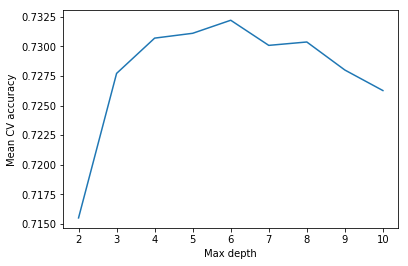

In [76]:
plt.plot(tree_params['max_depth'], 
         tree_grid.cv_results_['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean CV accuracy');

In [77]:
print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'max_depth': 6}
Best cross validaton score 0.732204081633


In [78]:
tuned_tree_acc_valid = accuracy_score(y_valid, 
                                      tree_grid.predict(X_valid))
tuned_tree_acc_valid

0.72566666666666668

In [79]:
tuned_tree_acc_valid / tree_acc_valid - 1

0.0060738099953785429